<a href="https://colab.research.google.com/github/kiet0807/CS114.L21/blob/main/Number_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras. datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
y_train[0]

# Có 60K ảnh train và 10K ảnh test

5

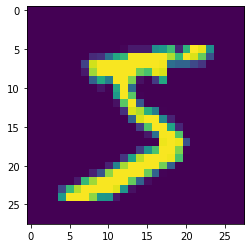

In [ ]:
plt.imshow(X_train[0])
#Ảnh đầu vào có kích thước 28x28 là các chữ số

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [ ]:
#one-hot encode target column
#Chuyển về one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 235s 125ms/step - loss: 0.9149 - accuracy: 0.8680 - val_loss: 0.0987 - val_accuracy: 0.9680
Epoch 2/5
1875/1875 [==============================] - 238s 127ms/step - loss: 0.0753 - accuracy: 0.9770 - val_loss: 0.0714 - val_accuracy: 0.9789
Epoch 3/5
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0580 - val_accuracy: 0.9830
Epoch 4/5
1875/1875 [==============================] - 229s 122ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0482 - val_accuracy: 0.9843
Epoch 5/5
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0416 - accuracy: 0.9872 - val_loss: 0.0437 - val_accuracy: 0.9864


In [ ]:
y_hat = model.predict(X_test[0:1])
y_hat

array([[4.3589837e-12, 4.7456739e-10, 2.0639072e-07, 2.1693810e-07,
        1.7596610e-12, 8.7666492e-11, 1.2083601e-13, 9.9999702e-01,
        1.3881906e-09, 2.5379536e-06]], dtype=float32)

In [ ]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([7])

In [ ]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(y_test[:4], axis =1)

array([7, 2, 1, 0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


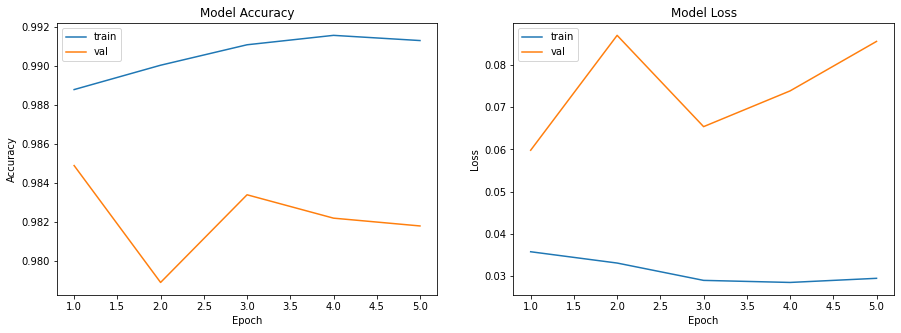

<Figure size 432x288 with 0 Axes>

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(model_history.history[acc]) + 1), model_history.history[acc])
    axs[0].plot(range(1, len(model_history.history[val_acc]) + 1), model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history[acc]) + 1), len(model_history.history[acc]) / 10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss']) / 10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    plt.savefig('roc.png')

plot_model_history(history)